## Generate random variables

a) Generate 1000 independent samples from Normal distribution with mean $\mu = 0$ and variance $\sigma^2 = 1$. Plot and visualize the data.

(Hint: Generate Gaussian samples from uniform random variables.)


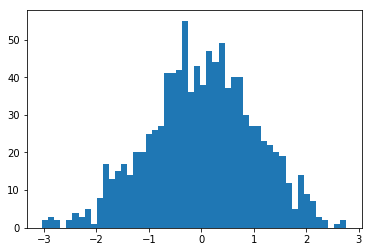

In [137]:
import numpy as np
from scipy import special
from scipy import stats
from matplotlib import pyplot as plt
X = np.random.uniform(low=0.0,high=1.0,size=1000)
mean = 0
variance = 1
# F unverse function to convert from uniform to normal
X_norm = mean + np.sqrt(variance*2)*special.erfinv(2*X-1)
plt.hist(X_norm,bins=50)
plt.show()

### Generate correlated random variables

b) Generate 1000 independent samples from Bivariate Normal distribution with means $\mu_{X} = \mu_{Y} = 0$, variances $\sigma_{X}^2 = \sigma_{Y}^2 = 1$ and correlation coefficient $\rho = - 0.9$. Plot and visualize the data in 2D and 3D.

(Hint: If (X,Y) is Bivariate Normal with $\mu_X = \mu_Y = 0$, $\sigma_X^2 = \sigma^2_Y = 1$ and correlation coefficient $\rho$, then the conditional distribution of $Y$ (conditioned on $X = x$) is Normal with mean $\rho x$ and variance $1 - \rho^2$, i.e., $Y|_{X = x} \sim {\mathcal N}(\rho x, 1 - \rho^2)$.)


In [138]:
mean_x = 0
mean_y = 0 
var_x = 1
var_y = 1
p = -0.9

X = np.random.uniform(low=0.0,high=1.0,size=1000)
# F unverse function to convert from uniform to normal
X_norm = mean_x + np.sqrt(var_x*2)*special.erfinv(2*X-1)
y = []
for x in X_norm:
    var_y = 1 - p**2
    y.append(p*x + np.sqrt(var_y*2)*special.erfinv(2*np.random.uniform(low=0.0,high=1.0,size=1)-1))
Y_norm = np.ravel(np.array(y))

COV_matrix = np.corrcoef(X_norm,Y_norm)
print("Covariance matrix:{}".format(COV_matrix))
X =  np.stack([X_norm,Y_norm],axis=1)
# 3D using PDFs
Z = stats.multivariate_normal.pdf(X,[0,0],COV_matrix)

Covariance matrix:[[ 1.         -0.89063354]
 [-0.89063354  1.        ]]


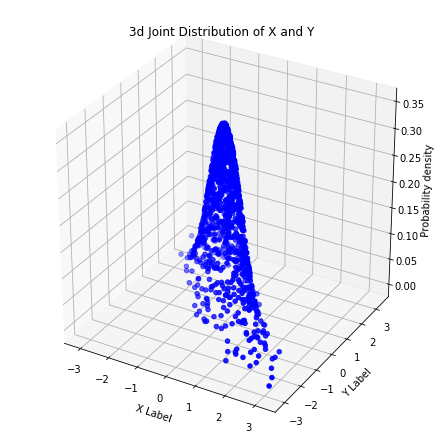

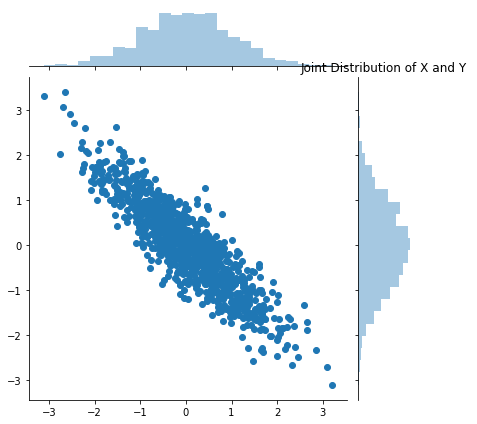

In [139]:
#2D plot
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = [6,6])

#3d plot
ax = Axes3D(fig) 
ax.scatter(X[:,0],X[:,1], Z, c='b', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Probability density')
plt.title("3d Joint Distribution of X and Y ")


#2d plot
sns.jointplot(X_norm,Y_norm)
plt.title("Joint Distribution of X and Y ")

plt.show()


## Estimate correlation coefficient

The file 'data_corr.csv' has 1000 independent samples from a Bivariate Normal distribution with means $\mu_X = \mu_Y = 0$, variances $\sigma_X^2 = \sigma_Y^2 = 1$ and unknown correlation coefficient $\rho$.

c) Load the data from the file 'data_corr.npz'. Plot and visualize the marginal and joint distributions of $X$ and $Y$.

d) Comment on the nature of correlation observed in the data.

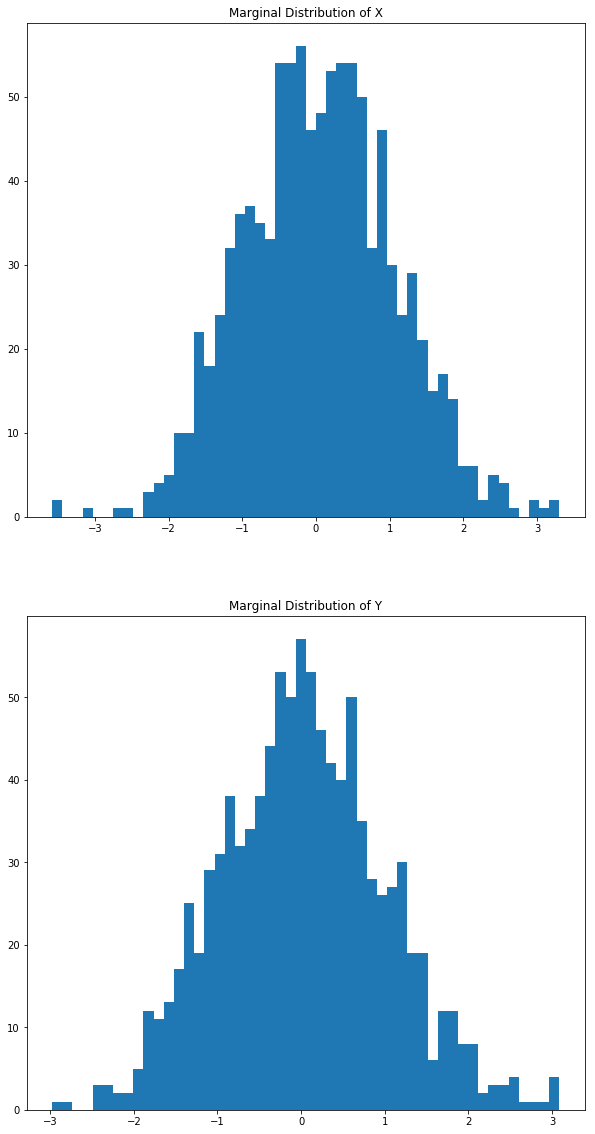

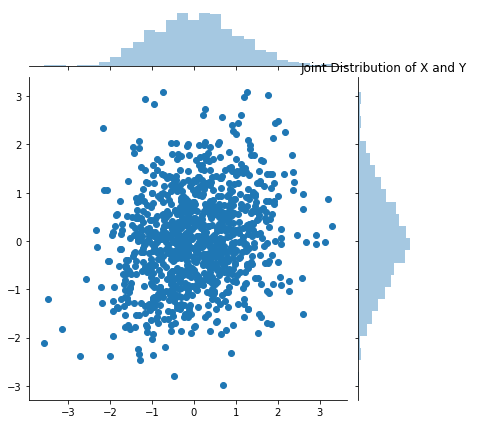

In [140]:
import pandas as pd


fig = plt.figure(figsize = [10,20])
df = pd.read_csv("./data_corr.csv")
x = df["X"].values
y = df["Y "].values

#Marginal distributions of X
plt.subplot(2, 1, 1)
plt.hist(x,bins=50)
plt.title("Marginal Distribution of X")

#Marginal distributions of Y
plt.subplot(2, 1, 2)
plt.hist(y,bins=50)
plt.title("Marginal Distribution of Y")


#Joint distribution of X and Y
# plt.subplot(3, 1, 3)
sns.jointplot(x,y)
plt.title("Joint Distribution of X and Y ")


plt.show()


In [141]:
#correlation function
print("Pearson Correlation coefficient:{}".format(np.corrcoef(x,y)[0,1]))


Pearson Correlation coefficient:0.2281251636785566


### Maximum Likelihood Estimate using Grid Search

e) Let ${\mathsf P}_{\rho}(\mathbf{X} = \mathbf{x}, \mathbf{Y} = \mathbf{y})$ denote the likelihood function (for the observation $(\mathbf{x}, \mathbf{y})$, as a function of the parameter $\rho$). Compute the likelihood function for the given data and find the maximum likelihood estimate of $\rho$, $\hat{\rho}_{ML}$, using grid search.

(Hint: Plot ${\mathsf P}_{\rho}(\cdot,\cdot)$ as a function of $\rho$.)

/home/vishwesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


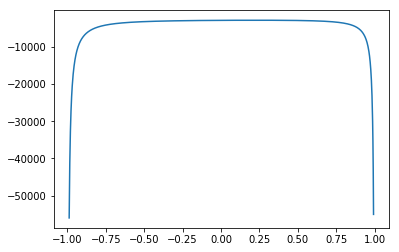

From maximizing the log likelihood function we get:0.22899999999999998 
log maximum liklihood function value:-2811.2974951256265 


In [142]:
df = pd.read_csv("./data_corr.csv")
x = df["X"].values
y = df["Y "].values
X =  np.stack([x,y],axis=1)
p_list = np.linspace(start = -0.999,stop = 0.999, num = 1000)
maxlike_func = []
for p in p_list:
    Cov_matrix = np.array([[1,p],[p,1]])
    Z = np.log(stats.multivariate_normal.pdf(X,[0,0],Cov_matrix))
    maxlike_func.append(np.sum(Z))
#Plotting 
plt.plot(p_list,maxlike_func)
plt.show()

#
maxlike_func=np.array(maxlike_func)
ind = np.argmax(maxlike_func)
print("From maximizing the log likelihood function we get:{} \nlog maximum liklihood function value:{} ".format(p_list[ind],maxlike_func[ind]))

### Maximum Likelihood Estimate using Gradient Descent

f) Find the maximum likelihood estimate of $\rho$, $\hat{\rho}_{ML}$, using gradient descent. Plot the estimate of $\rho$ (versus iteration) for different choices of step size (e.g., 0.001, 0.01, 0.1).

In [143]:
#gradient descent 
df = pd.read_csv("./data_corr.csv")
x = df["X"].values
y = df["Y "].values
X =  np.stack([x,y],axis=1)
N = len(x)
step_size_list = [0.001,0.01,0.1]
p_list = []
for step in step_size_list:
    print("\n For step size:{}".format(step))
    p = 0.1
    count = 0
    cost_diff = 10000  
    prev_cost = 0     
    while abs(cost_diff)>0.000001:
        Cov_matrix = np.array([[1,p],[p,1]])
        Z = np.log(stats.multivariate_normal.pdf(X,[0,0],Cov_matrix))
        cost = np.sum(Z)
        derv_cost = p/(1-p**2) - (1/N)*(p/((1-p**2)**2))*np.sum(x**2-2*p*np.multiply(x,y)+y**2) + (1/(N*(1-p**2)))*np.sum(np.multiply(x,y))
        p = p + step*derv_cost
        cost_diff = cost-prev_cost
        prev_cost = cost
        if count%50==0: 
            print("Step_size:{}, Cost:{}, p:{}".format(step,cost,p))
        count+=1
    p_list.append(p)


 For step size:0.001
Step_size:0.001, Cost:-2820.223223519785, p:0.10013334509110204
Step_size:0.001, Cost:-2819.374800566321, p:0.10664122792714456
Step_size:0.001, Cost:-2818.6036128299984, p:0.11284580609088755
Step_size:0.001, Cost:-2817.9028728864364, p:0.11876018430588686
Step_size:0.001, Cost:-2817.266399061211, p:0.12439680991770458
Step_size:0.001, Cost:-2816.688552704625, p:0.12976753842814404
Step_size:0.001, Cost:-2816.1641841259484, p:0.13488368874656462
Step_size:0.001, Cost:-2815.688585670567, p:0.13975608978308376
Step_size:0.001, Cost:-2815.2574507163517, p:0.1443951197543263
Step_size:0.001, Cost:-2814.866837599176, p:0.14881073936291053
Step_size:0.001, Cost:-2814.5131376647823, p:0.15301251983765918
Step_size:0.001, Cost:-2814.193046794826, p:0.1570096666754127
Step_size:0.001, Cost:-2813.9035398764736, p:0.16081103980177802
Step_size:0.001, Cost:-2813.641847783179, p:0.16442517076294763
Step_size:0.001, Cost:-2813.4054365137717, p:0.16786027747055984
Step_size:0.0

In [144]:
p_list

[0.2284404577766735, 0.2290293048061004, 0.22922414773922414]

### Maximum Likelihood Estimate (Analysis)

g) Find the maximum likelihood estimate of $\rho, \hat{\rho}_{ML}$ analytically (from the likelihood function).

In [145]:
#Equating derivative of MLE equation to 0, we get cubic in p, in the form of a*p^3 + b*p^2 + c*p + d
a = 1
b = -(1/N)*np.sum(np.multiply(x,y))
c = ((1/N)*np.sum(x**2 + y**2) - 1)
d = -(1/N)*np.sum(np.multiply(x,y))

#finding roots of the equation
coeff = [a,b,c,d]
print(np.roots(coeff))
print("We consider the real roots which is p_ml:{}".format(np.roots(coeff)[-1]))

[9.72001404e-05+1.00042382j 9.72001404e-05-1.00042382j
 2.29291505e-01+0.j        ]
We consider the real roots which is p_ml:(0.22929150491755662+0j)


### Simple Linear Regression

h) Using linear regression, seek a relation between $Y$ and $X$ (i.e., express $Y$ as a linear function of $X$). Comment.

In [146]:
#We use the formula inv(x.t*x)*x.T*y
X =  np.stack([np.ones(N),x],axis=1)
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
print("We get Y ={}*X + {}".format(w[1],w[0]))

We get Y =0.22209297029587477*X + 0.02388922099139091


We get the intercept close to 0 and slope as the correlation coefficient which seems equivalent to saying deterministic version of P(Y|X) which has mean= p*x and varaiance = (1-p^2)

## Polynomial Regression

Load the two dimensional data from the file 'data_poly1.npz'.

i) Plot the data and comment on the relation between $X$ and $Y$ (plot $Y$ as a function of $X$).

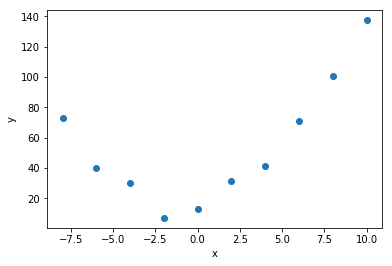

In [147]:
with np.load("./data_poly1.npz") as data:
    x = data['x']
    y = data['y']
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

From the graph it is clear that x and y are quadraticaly related

### Polynomial Regression using Scikit-learn Libraries

Fit a polynomial model (for the suggested degree) to the data. Comment on the fit (as a function of the model) in terms of the mean square error.

(Hint: Use in-built libraries from Scikit-learn for the exercise.)

The parameters are([1,x,x2]): [16.48939627  1.88715501  1.06173497]
MSE:24.846331727808156


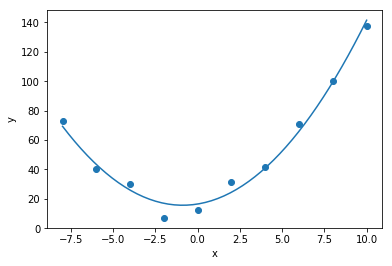

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#Suggested degree = 2 as it seems its quadratic
degree = 2
#Generating quadratic features [1,x,x^2]
poly = PolynomialFeatures(degree)
x_poly=poly.fit_transform(x.reshape(-1,1))
#Fitting using linear regression
reg = LinearRegression().fit(x_poly, y)
coefficients = reg.coef_.copy()
coefficients[0] = reg.intercept_
print("The parameters are([1,x,x2]): {}".format(coefficients))
#MSE
y_pred = reg.predict(x_poly)
print("MSE:{}".format(np.mean((y-y_pred)**2)))
#Plot
x_plot = np.linspace(start=max(x),stop=min(x),num=50)
x_plot_poly=poly.fit_transform(x_plot.reshape(-1,1))
y_plot = reg.predict(x_plot_poly)
#data points
plt.scatter(x,y)
#Fitted line
plt.plot(x_plot,y_plot)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Even though mean squared error is 24.84, the quadratic function fits perfectly without overfitting, the mean squared error is high because of random errors, since our model didnt overfit for these errors we are getting a high MSE value

### Degree 1 (Linear)

j) Using linear regression, seek a relation between $Y$ and $X$. Plot the function and report the mean square error.

The parameters are([1,x]): [50.46491532  4.01062495]
MSE:977.1734445909718


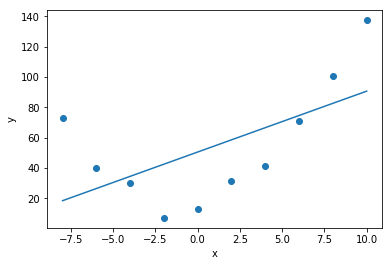

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#Given degree
degree = 1
#Generating quadratic features [1,x]
poly = PolynomialFeatures(degree)
x_poly=poly.fit_transform(x.reshape(-1,1))
#Fitting using linear regression
reg = LinearRegression().fit(x_poly, y)
coefficients = reg.coef_.copy()
#Since we consider 1 as a feature the coefficent of that variable is 0 hence we take it from reg.intercept_
coefficients[0] = reg.intercept_
print("The parameters are([1,x]): {}".format(coefficients))
#MSE
y_pred = reg.predict(x_poly)
print("MSE:{}".format(np.mean((y-y_pred)**2)))
#Plot
x_plot = np.linspace(start=max(x),stop=min(x),num=50)
x_plot_poly=poly.fit_transform(x_plot.reshape(-1,1))
y_plot = reg.predict(x_plot_poly)
#data points
plt.scatter(x,y)
#Fitted line
plt.plot(x_plot,y_plot)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Degree 2 (Quadratic)

k) Using polynomial regression of degree 2, seek a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

The parameters are([1,x,x2]): [16.48939627  1.88715501  1.06173497]
MSE:24.846331727808156


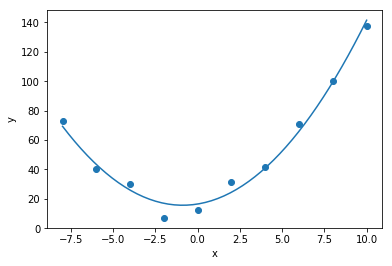

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#Given degree
degree = 2
#Generating quadratic features [1,x]
poly = PolynomialFeatures(degree)
x_poly=poly.fit_transform(x.reshape(-1,1))
#Fitting using linear regression
reg = LinearRegression().fit(x_poly, y)
coefficients = reg.coef_.copy()
coefficients[0] = reg.intercept_
print("The parameters are([1,x,x2]): {}".format(coefficients))
#MSE
y_pred = reg.predict(x_poly)
print("MSE:{}".format(np.mean((y-y_pred)**2)))
#Plot
x_plot = np.linspace(start=max(x),stop=min(x),num=50)
x_plot_poly=poly.fit_transform(x_plot.reshape(-1,1))
y_plot = reg.predict(x_plot_poly)
#data points
plt.scatter(x,y)
#Fitted line
plt.plot(x_plot,y_plot)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Degree 9

l) Using polynomial regression of degree 9, seek a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

The parameters are([1,x,x2,x3,x4,x5,x6,x7,x8,x9]): [ 1.25884039e+01  9.64173973e+00  1.77416833e+00 -1.02695212e+00
 -2.26511427e-02  4.05873979e-02  1.45203201e-04 -5.81826007e-04
  9.19547984e-07  2.62670424e-06]
MSE:8.007064354002041e-14


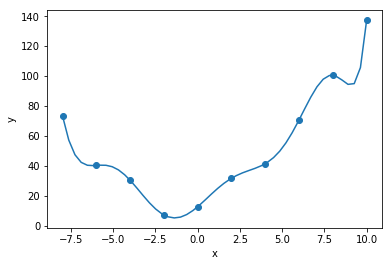

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#Given degree
degree = 9
#Generating quadratic features [1,x]
poly = PolynomialFeatures(degree)
x_poly=poly.fit_transform(x.reshape(-1,1))
#Fitting using linear regression
reg = LinearRegression().fit(x_poly, y)
coefficients = reg.coef_.copy()
coefficients[0] = reg.intercept_
print("The parameters are([1,x,x2,x3,x4,x5,x6,x7,x8,x9]): {}".format(coefficients))
#MSE
y_pred = reg.predict(x_poly)
print("MSE:{}".format(np.mean((y-y_pred)**2)))
#Plot
x_plot = np.linspace(start=max(x),stop=min(x),num=50)
x_plot_poly=poly.fit_transform(x_plot.reshape(-1,1))
y_plot = reg.predict(x_plot_poly)
#data points
plt.scatter(x,y)
#Fitted line
plt.plot(x_plot,y_plot)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Training Error

m) Plot the mean square error versus the degree of the polynomial fit (for degree = 0,1, ..., 9). Comment on the best model for the data.

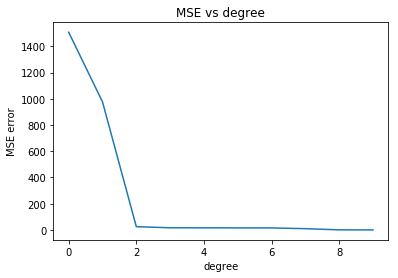

In [152]:
degree_list = [0,1,2,3,4,5,6,7,8,9]
mse_list = []
for degree in degree_list:
    #Generating polynomial features 
    poly = PolynomialFeatures(degree)
    x_poly=poly.fit_transform(x.reshape(-1,1))
    #Fitting using linear regression
    reg = LinearRegression().fit(x_poly, y)
    #MSE
    y_pred = reg.predict(x_poly)
    mse_list.append(np.mean((y-y_pred)**2))
plt.plot(degree_list,mse_list)
plt.title("MSE vs degree")
plt.xlabel("degree")
plt.ylabel("MSE error")
plt.show()

From the graph even though as degree increases the error goes to 0, the model is fitting for random errors in variable hence MSE decreases. From the graph the sudden plummet at degree 2 indicates that model with degree 2 is the best

### Test error

Load 'data_poly2.npz'. The data points in the file are from the same sample as 'data_poly1.npz'.

n) Plot the mean square error (for degrees 0,1,...,9) for the test data set, for the polynomial fit obtained with the training data set 'data_poly1.npz'. Now, comment on the best model for data.

(Hint: Plot Training error and Testing error in the same plot.)

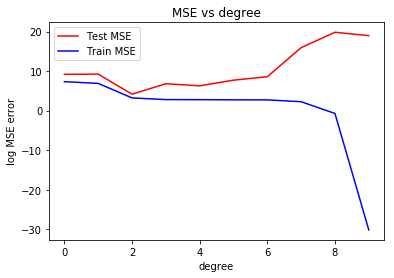

In [153]:
with np.load("./data_poly2.npz") as data:
    x_test = data['x']
    y_test = data['y']
degree_list = [0,1,2,3,4,5,6,7,8,9]
mse_list_test = []
mse_list_train = []
for degree in degree_list:
    #Generating polynomial features 
    poly = PolynomialFeatures(degree)
    x_poly=poly.fit_transform(x.reshape(-1,1))
    x_poly_test=poly.fit_transform(x_test.reshape(-1,1))
    #Fitting using linear regression
    reg = LinearRegression().fit(x_poly, y)
    #MSE
    y_pred_test = reg.predict(x_poly_test)
    y_pred_train = reg.predict(x_poly)
    mse_list_test.append(np.log(np.mean((y_test-y_pred_test)**2)))
    mse_list_train.append(np.log(np.mean((y-y_pred_train)**2))) 
plt.plot(degree_list,mse_list_test,color="red")
plt.plot(degree_list,mse_list_train,color="blue")
plt.legend(["Test MSE","Train MSE"])
plt.title("MSE vs degree")
plt.xlabel("degree")
plt.ylabel("log MSE error")
plt.show()

PLotting log scale MSE and degree we find that for Test MSE the lowest test error occurs at degree =2, for degree>2 the train error goes to 0 but the test error blows up really fast showing that models after degree=2 are severly overfitting